In [1]:
## running once
%load_ext autoreload
%autoreload 2

## Read OSM-PBF

In [49]:
import geopandas as gpd
import pandas as pd
import numpy as np
import pyrosm
import os

mapdir = "/home/xiucheng/data/map/"
mapcty = os.path.join(mapdir, "newyork.osm.pbf")

In [50]:
osm = pyrosm.OSM(mapcty)

In [51]:
drive_net = osm.get_network(network_type="driving")

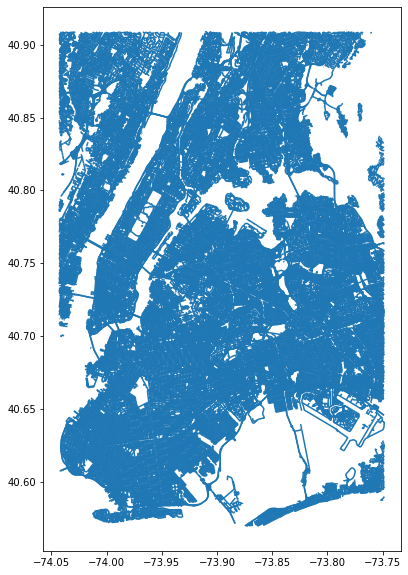

In [52]:
drive_net.plot(figsize=(10, 10))

In [54]:
drive_net.highway.value_counts()

service           29329
residential       24080
secondary          6381
primary            5574
tertiary           3358
motorway_link      2296
motorway           1712
unclassified       1032
trunk               857
primary_link        427
trunk_link          248
secondary_link      241
tertiary_link       131
path                 26
living_street        10
footway               6
pedestrian            5
road                  3
cycleway              2
construction          2
track                 1
disused               1
bus_guideway          1
Name: highway, dtype: int64

## Using osmnx

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os

from collections import namedtuple
from toolz.curried import *
import matplotlib.pyplot as plt
%matplotlib inline

uberdir = "/home/xiucheng/data/uber-movement/"
nykjuly = os.path.join(uberdir, "movement-speeds-hourly-new-york-2019-7.csv.zip")
nykaugs = os.path.join(uberdir, "movement-speeds-hourly-new-york-2019-8.csv.zip")
nyksept = os.path.join(uberdir, "movement-speeds-hourly-new-york-2019-9.csv.zip")
zipflst = [nykjuly, nykaugs, nyksept]

### Road segments statistics

In [313]:
columns = ["osm_way_id", "osm_start_node_id", "osm_end_node_id"]
Osmids = namedtuple("Osmids", columns)

def unique_ids(df):
    return Osmids(*(df[column].unique() for column in columns))

osm_ids_lst = [pd.read_csv(zipf, usecols=columns).pipe(unique_ids) for zipf in zipflst]

In [20]:
osm_ids = reduce(lambda a,x: Osmids(*(np.union1d(a[i],x[i]) for i in range(len(columns)))), 
                 osm_ids_lst[:3])

In [21]:
len(osm_ids.osm_way_id)

33320

### Visualizing the virtual nodes

OSM data includes lots of nodes that exist only as points helping streets bend around curves.

In [2]:
import osmnx as ox

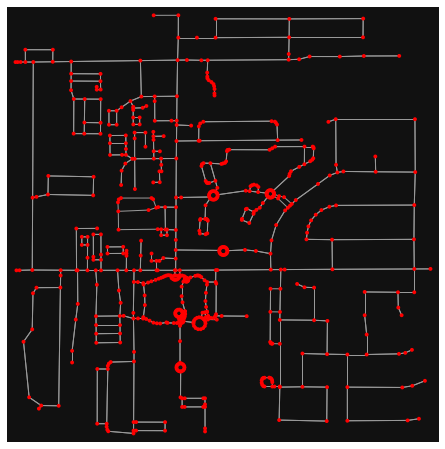

In [16]:
location_point = (33.299896, -111.831638)
G1 = ox.graph_from_point(location_point, dist=500, simplify=False)
fig, ax = ox.plot_graph(G1, node_color='r')

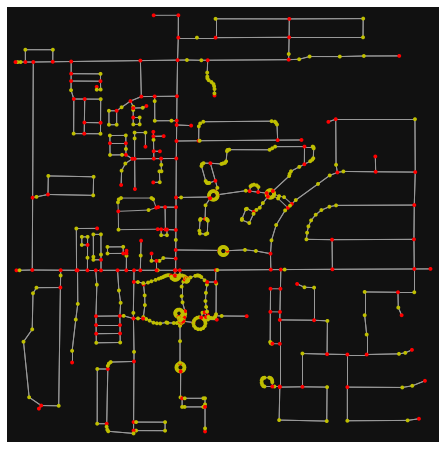

In [18]:
nc = ['r' if ox.simplification._is_endpoint(G1, node) else 'y' for node in G1.nodes()]
fig, ax = ox.plot_graph(G1, node_color=nc)

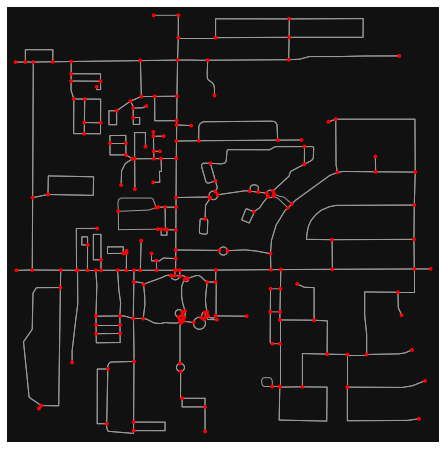

In [21]:
fig, ax = ox.plot_graph(ox.simplify_graph(G1), node_color='r')

### Reading map data using osmnx

In [5]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os

from collections import namedtuple
from toolz.curried import *
import matplotlib.pyplot as plt

uberdir = "/home/xiucheng/data/uber-movement/"
nykjuly = os.path.join(uberdir, "movement-speeds-hourly-new-york-2019-7.csv.zip")
nykaugs = os.path.join(uberdir, "movement-speeds-hourly-new-york-2019-8.csv.zip")
nyksept = os.path.join(uberdir, "movement-speeds-hourly-new-york-2019-9.csv.zip")
zipflst = [nykjuly, nykaugs, nyksept]

In [6]:
df = pd.read_csv(nykjuly)
print(df.shape)
print("Number of road segments:", len(df.osm_way_id.unique()))

(25365815, 13)
Number of road segments: 31589


In [7]:
df.head(5)

year  month  day  hour             utc_timestamp  \
0  2019      7    1    14  2019-07-01T18:00:00.000Z   
1  2019      7   13    22  2019-07-14T02:00:00.000Z   
2  2019      7    7    14  2019-07-07T18:00:00.000Z   
3  2019      7    3    18  2019-07-03T22:00:00.000Z   
4  2019      7   13    14  2019-07-13T18:00:00.000Z   

                                 segment_id  \
0  ffd5b0eb2ebe47dc55977417d7b9de8a2453fbef   
1  ffd5b0eb2ebe47dc55977417d7b9de8a2453fbef   
2  ffd5b0eb2ebe47dc55977417d7b9de8a2453fbef   
3  ffd5b0eb2ebe47dc55977417d7b9de8a2453fbef   
4  ffd5b0eb2ebe47dc55977417d7b9de8a2453fbef   

                          start_junction_id  \
0  33022b4b089929847e9047cbf4d911149b15eb1b   
1  33022b4b089929847e9047cbf4d911149b15eb1b   
2  33022b4b089929847e9047cbf4d911149b15eb1b   
3  33022b4b089929847e9047cbf4d911149b15eb1b   
4  33022b4b089929847e9047cbf4d911149b15eb1b   

                            end_junction_id  osm_way_id  osm_start_node_id  \
0  61e031cf1bb3c398a0b67a985cf50d6f4b553d89   627639479         5924962522   
1  61e031cf1bb3c398a0b67a985cf50d6f4b553d89   627639479         5924962522   
2  61e031cf1bb3c398a0b67a985cf50d6f4b553d89   627639479         5924962522   
3  61e031cf1bb3c398a0b67a985cf50d6f4b553d89   627639479         5924962522   
4  61e031cf1bb3c398a0b67a985cf50d6f4b553d89   627639479         5924962522   

   osm_end_node_id  speed_mph_mean  speed_mph_stddev  
0       5924962521          20.875             2.437  
1       5924962521          19.129             2.779  
2       5924962521          23.247             4.301  
3       5924962521          21.061             2.637  
4       5924962521          22.501             3.983

In [5]:
from utils import *

In [ ]:
## running once
#place_names = ['Manhattan, New York, USA']
#save_graphml_from_places(place_names, "data/newyork/")

In [ ]:
#G = ox.load_graphml("data/newyork/graph.graphml")
#fig, ax = ox.plot_graph(G, node_size=0, edge_color='w', edge_linewidth=0.25)

In [6]:
nodes, edges = load_gdfs("data/newyork/")

There are 4588 nodes and 9893 edges in the road networks.


In [7]:
#G = ox.graph_from_gdfs(nodes, edges)
#edges.head(5)

In [45]:
mh = attach_edgeid(nodes, edges, df)
mh.shape

(2653457, 11)

In [33]:
num_segs = mh.groupby(['day', 'hour']).size().values

coverage_ratios = num_segs / edges.shape[0]

print("Mean: {:.3}, Max: {:.3}, Min: {:.3}".format(np.mean(coverage_ratios),
                                                   np.max(coverage_ratios),
                                                   np.min(coverage_ratios)))

Mean: 0.371, Max: 0.536, Min: 0.15


In [ ]:
#hf = pipe(mh.groupby(['day', 'hour']), first, second)

## Split data into observed and unobserved parts

In [46]:
obs, unobs = split_obs_unobs(mh, 0.9)
obs_list = [g for (_, g) in obs.groupby(['month', 'day', 'hour'])]
unobs_list = [g for (_, g) in unobs.groupby(['month', 'day', 'hour'])]

n_test = 2 * 24

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Gaussian Process

$$
\left[\begin{array}{c}h\left(x^{(1)}\right) \\ \vdots \\ h\left(x^{(m)}\right)\end{array}\right] \sim \mathcal{N}\left(\left[\begin{array}{c}m\left(x^{(1)}\right) \\ \vdots \\ m\left(x^{(m)}\right)\end{array}\right],\left[\begin{array}{ccc}k\left(x^{(1)}, x^{(1)}\right) & \cdots & k\left(x^{(1)}, x^{(m)}\right) \\ \vdots & \ddots & \vdots \\ k\left(x^{(m)}, x^{(1)}\right) & \cdots & k\left(x^{(m)}, x^{(m)}\right)\end{array}\right]\right)
$$

$$\left[\begin{array}{l}y \\ y_{*}\end{array}\right] \mid X, X_{*}=\left[\begin{array}{l}h \\ h_{*}\end{array}\right]+\left[\begin{array}{l}\varepsilon \\ \varepsilon_{*}\end{array}\right] \sim \mathcal{X}\left(0,\left[\begin{array}{ll}K_{y} & K_{*} \\ K_{*}^{T} & K_{* *}\end{array}\right]\right)
$$

The prediction:

$\mu_{*}=K_{*}^{T} K_{y}^{-1} y$


$\Sigma_{*}=K_{* *}-K_{*}^{T} K_{y}^{-1} K_{*}$

In [90]:
from gaussianprocess import gpfit
from tqdm import tqdm

np.random.seed(123)
torch.manual_seed(123)

In [91]:
test_stats = pd.DataFrame({})
for i, (hf_train, hf_test) in enumerate(zip(obs_list[-n_test:], unobs_list[-n_test:])):
    X_train = get_coords(edges, hf_train.edgeid.values)
    y_train = hf_train.speed_mph_mean.values
    X_test = get_coords(edges, hf_test.edgeid.values)
    gp = gpfit(X_train, y_train, length_scale=10., alpha=1.0)

    y_pred = gp.predict(X_test)
    y_test = hf_test.speed_mph_mean.values
    edgeid = hf_test.edgeid.values

    test_stats = collect_test_stats(test_stats, i, edgeid, y_test, y_pred)
    if i % 10 == 0:
        print(f"Snapshot {i:4d}" + evaluated_message(y_test, y_pred))

save_test_stats(test_stats, "data/exp", "gp_test_stats")        
gp_test_stats = test_stats

Snapshot    0 RMSE:   5.752 MAE:   4.553 Max Error:   18.34 MAEP:  0.3985
Snapshot   10 RMSE:   6.062 MAE:   4.567 Max Error:   28.69 MAEP:  0.4981
Snapshot   20 RMSE:   6.085 MAE:   4.495 Max Error:   40.58 MAEP:  0.3523
Snapshot   30 RMSE:   6.073 MAE:   5.013 Max Error:   25.07 MAEP:  0.3417
Snapshot   40 RMSE:    4.97 MAE:   4.043 Max Error:   18.49 MAEP:  0.4563


In [92]:
print(evaluated_message(gp_test_stats.y_test, gp_test_stats.y_pred))

 RMSE:   5.793 MAE:   4.477 Max Error:   42.49 MAEP:  0.4055


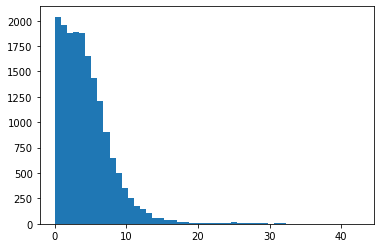

In [93]:
abs_errors = np.abs(gp_test_stats.y_test - gp_test_stats.y_pred)
plt.hist(abs_errors, bins=50);

## Progressive Aggregation

In [94]:
from graphaggregation import *

np.random.seed(123)
torch.manual_seed(123)

In [95]:
dG = edge_topology_from_edges(edges)

In [98]:
test_stats = pd.DataFrame({})
for i, (hf_train, hf_test) in enumerate(zip(obs_list[-n_test:], unobs_list[-n_test:])):
    dG = attach_observation(dG, hf_train)
    result = progressive_aggregatation(dG)

    y_test = hf_test.speed_mph_mean.values
    y_pred = result[hf_test.edgeid].values
    edgeid = hf_test.edgeid.values

    test_stats = collect_test_stats(test_stats, i, edgeid, y_test, y_pred)
    if i % 10 == 0:
        print(f"Snapshot {i:4d}" + evaluated_message(y_test, y_pred))

save_test_stats(test_stats, "data/exp", "pa_test_stats")        
pa_test_stats = test_stats

Snapshot    0 RMSE:   5.485 MAE:   4.096 Max Error:   17.88 MAEP:  0.3267
Snapshot   10 RMSE:   5.347 MAE:   4.073 Max Error:   25.83 MAEP:  0.4307
Snapshot   20 RMSE:   5.695 MAE:   4.294 Max Error:   33.55 MAEP:  0.3472
Snapshot   30 RMSE:   5.711 MAE:   4.451 Max Error:   21.48 MAEP:  0.2861
Snapshot   40 RMSE:   4.746 MAE:   3.812 Max Error:    15.9 MAEP:  0.4146


In [99]:
print(evaluated_message(pa_test_stats.y_test, pa_test_stats.y_pred))

 RMSE:   5.451 MAE:    4.18 Max Error:   41.37 MAEP:   0.372


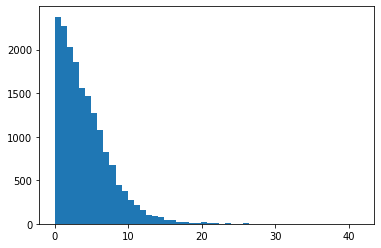

In [100]:
abs_errors = np.abs(pa_test_stats.y_test - pa_test_stats.y_pred)
plt.hist(abs_errors, bins=50);

## Graph Autoencoder

In [16]:
from graphautoencoder import (edge_topology_from_edges, DataLoader,
                              get_data, ChebNet)
import graphautoencoder as ga

np.random.seed(123)
torch.manual_seed(123)

In [19]:
dG = edge_topology_from_edges(edges)
dG.number_of_nodes()

9893

In [17]:
batch_size = 1
num_epochs = 15

In [20]:
trn_list = [get_data(dG, o, u) for (o, u) in zip(obs_list[:-n_test], unobs_list[:-n_test])]
tst_list = [get_data(dG, o, u) for (o, u) in zip(obs_list[-n_test:], unobs_list[-n_test:])]

In [21]:
trn_loader = DataLoader(trn_list, batch_size=batch_size)
tst_loader = DataLoader(tst_list, batch_size=batch_size)

In [110]:
model = ChebNet(1, dG.number_of_nodes()).to(device)
#model = GCNNet(1, dG.number_of_nodes()).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [111]:
%%time
for epoch in range(num_epochs):
    ga.train(epoch, optimizer, trn_loader, model, device)

Epoch is 0, Training Loss is 58.82590
Epoch is 1, Training Loss is 32.46807
Epoch is 2, Training Loss is 23.73705
Epoch is 3, Training Loss is 20.14596
Epoch is 4, Training Loss is 18.58180
Epoch is 5, Training Loss is 18.41428
Epoch is 6, Training Loss is 18.71707
Epoch is 7, Training Loss is 18.38896
Epoch is 8, Training Loss is 18.07777
Epoch is 9, Training Loss is 17.68357
Epoch is 10, Training Loss is 17.52310
Epoch is 11, Training Loss is 17.30043
Epoch is 12, Training Loss is 17.08414
Epoch is 13, Training Loss is 17.05154
Epoch is 14, Training Loss is 16.93286
CPU times: user 13min 1s, sys: 7.4 s, total: 13min 9s
Wall time: 4min 56s


In [112]:
ga_test_stats = ga.test(tst_loader, model, device)
save_test_stats(ga_test_stats, "data/exp", "ga_test_stats")

Snapshot    0 RMSE:   3.798 MAE:   3.069 Max Error:   18.36 MAEP:  0.2278
Snapshot   10 RMSE:   4.049 MAE:    3.11 Max Error:   14.58 MAEP:  0.3385
Snapshot   20 RMSE:   2.784 MAE:   2.185 Max Error:   8.607 MAEP:  0.1561
Snapshot   30 RMSE:   4.232 MAE:   3.122 Max Error:   28.48 MAEP:  0.1698
Snapshot   40 RMSE:    3.72 MAE:    2.84 Max Error:   12.91 MAEP:   0.323


In [113]:
print(evaluated_message(ga_test_stats.y_test.values, ga_test_stats.y_pred.values))

 RMSE:   3.656 MAE:   2.792 Max Error:   28.48 MAEP:  0.2472


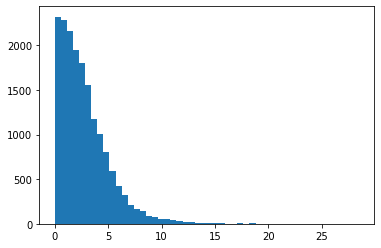

In [114]:
abs_errors = np.abs(ga_test_stats.y_test - ga_test_stats.y_pred)
plt.hist(abs_errors, bins=50);

## Naive MF

In [129]:
from naivemf import one_snapshot
import naivemf as nmf

np.random.seed(123)
torch.manual_seed(123)

num_epochs = 500
batch_size = 256
dim_size = 100

In [126]:
dG = edge_topology_from_edges(edges)
L = torch_sparse_laplacian(dG).to(device)

In [127]:
xa_obs = dataframe2xarray(obs, edges.shape[0])
xa_unobs = dataframe2xarray(unobs, edges.shape[0])

X_obs, X_unobs = torch.FloatTensor(xa_obs.values), torch.FloatTensor(xa_unobs.values)

In [131]:
test_stats = pd.DataFrame({})
i = 0

y_test, y_pred, edgeid = one_snapshot(
    X_obs[:, :-n_test+i], 
    X_unobs[:, :-n_test+i],
    L,
    num_epochs, 
    batch_size, 
    dim_size, 
    device
)

test_stats = collect_test_stats(test_stats, i, edgeid, y_test, y_pred)
print(evaluated_message(y_test, y_pred))

 RMSE:   2.291 MAE:   1.664 Max Error:   12.71 MAEP:  0.1069


In [117]:
%%time

test_stats = pd.DataFrame({})
for i in range(n_test):
    y_test, y_pred, edgeid = one_snapshot(
        X_obs[:, :-n_test+i], 
        X_unobs[:, :-n_test+i],
        L,
        num_epochs, 
        batch_size, 
        dim_size, 
        device
    )

    test_stats = collect_test_stats(test_stats, i, edgeid, y_test, y_pred)
    if i % 10 == 0:
        print(f"Snapshot {i:4d}" + evaluated_message(y_test, y_pred))

save_test_stats(test_stats, "data/exp", "nmf_test_stats")        
mf_test_stats = test_stats

Snapshot    0 RMSE:   2.224 MAE:   1.646 Max Error:   13.07 MAEP:  0.1056
Snapshot   10 RMSE:   2.685 MAE:   1.979 Max Error:   16.93 MAEP:  0.1846
Snapshot   20 RMSE:   2.735 MAE:    2.03 Max Error:   10.55 MAEP:  0.1692
Snapshot   30 RMSE:   2.708 MAE:    1.88 Max Error:   11.99 MAEP:  0.1049
Snapshot   40 RMSE:   2.761 MAE:   1.974 Max Error:   14.81 MAEP:  0.2184
CPU times: user 2h 41s, sys: 1min 37s, total: 2h 2min 18s
Wall time: 30min 33s


In [118]:
print(evaluated_message(nmf_test_stats.y_test.values, nmf_test_stats.y_pred.values))

 RMSE:   2.727 MAE:   1.972 Max Error:   20.64 MAEP:  0.1743


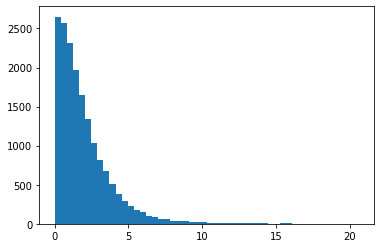

In [119]:
abs_errors = np.abs(nmf_test_stats.y_test - nmf_test_stats.y_pred)
plt.hist(abs_errors, bins=50);

## MF + Laplacian

In [220]:
from naivemf import one_snapshot
import naivemf as nmf

np.random.seed(123)
torch.manual_seed(123)

num_epochs = 500
batch_size = 256
dim_size = 100

In [124]:
dG = edge_topology_from_edges(edges)
L = torch_sparse_laplacian(dG).to(device)

In [126]:
%%time

test_stats = pd.DataFrame({})
for i in range(n_test):
    y_test, y_pred, edgeid = nmf.one_snapshot(
        X_obs[:, :-n_test+i], 
        X_unobs[:, :-n_test+i],
        L,
        num_epochs, 
        batch_size, 
        dim_size, 
        device,
        λ=1.0
    )

    test_stats = collect_test_stats(test_stats, i, edgeid, y_test, y_pred)
    if i % 10 == 0:
        print(f"Snapshot {i:4d}" + evaluated_message(y_test, y_pred))

save_test_stats(test_stats, "data/exp", "nmf_laplacian_test_stats")        
mf_laplacian_test_stats = test_stats

Snapshot    0 RMSE:   2.152 MAE:   1.595 Max Error:   11.63 MAEP:  0.1051
Snapshot   10 RMSE:   2.571 MAE:   1.929 Max Error:   14.93 MAEP:  0.1691
Snapshot   20 RMSE:   2.528 MAE:   1.848 Max Error:    10.0 MAEP:  0.1547
Snapshot   30 RMSE:   2.507 MAE:   1.782 Max Error:   10.63 MAEP: 0.09709
Snapshot   40 RMSE:   2.613 MAE:   1.885 Max Error:   12.77 MAEP:  0.2122
CPU times: user 2h 27min 32s, sys: 2min 6s, total: 2h 29min 39s
Wall time: 37min 23s


In [127]:
print(evaluated_message(mf_laplacian_test_stats.y_test.values, 
                        mf_laplacian_test_stats.y_pred.values))

 RMSE:   2.568 MAE:   1.875 Max Error:   20.66 MAEP:  0.1643


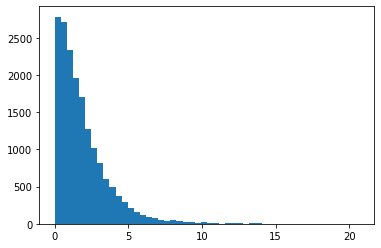

In [128]:
abs_errors = np.abs(mf_laplacian_test_stats.y_test - mf_laplacian_test_stats.y_pred)
plt.hist(abs_errors, bins=50);

### MF+Laplacian+L2

In [316]:
from naivemf import one_snapshot
import naivemf as nmf

np.random.seed(123)
torch.manual_seed(123)

num_epochs = 500
batch_size = 256
dim_size = 100

In [263]:
dG = edge_topology_from_edges(edges)
L = torch_sparse_laplacian(dG).to(device)

In [267]:
%%time

test_stats = pd.DataFrame({})
for i in range(n_test):
    y_test, y_pred, edgeid = nmf.one_snapshot(
        X_obs[:, :-n_test+i], 
        X_unobs[:, :-n_test+i],
        L,
        num_epochs, 
        batch_size, 
        dim_size, 
        device,
        λ=1.0,
        η=1e-2
    )

    test_stats = collect_test_stats(test_stats, i, edgeid, y_test, y_pred)
    if i % 10 == 0:
        print(f"Snapshot {i:4d}" + evaluated_message(y_test, y_pred))

save_test_stats(test_stats, "data/exp", "nmf_laplacian_l2_test_stats")        
mf_laplacian_l2_test_stats = test_stats

Snapshot    0 RMSE:   2.044 MAE:   1.451 Max Error:   11.48 MAEP: 0.09527
Snapshot   10 RMSE:   2.493 MAE:   1.855 Max Error:   15.02 MAEP:  0.1697
Snapshot   20 RMSE:   2.475 MAE:   1.792 Max Error:   11.12 MAEP:  0.1529
Snapshot   30 RMSE:   2.496 MAE:   1.733 Max Error:   11.17 MAEP: 0.09643
Snapshot   40 RMSE:   2.483 MAE:   1.804 Max Error:   11.22 MAEP:  0.2001
CPU times: user 3h 40min 39s, sys: 2min 38s, total: 3h 43min 18s
Wall time: 55min 50s


In [268]:
print(evaluated_message(mf_laplacian_l2_test_stats.y_test.values, 
                        mf_laplacian_l2_test_stats.y_pred.values))

 RMSE:   2.481 MAE:   1.795 Max Error:    18.9 MAEP:  0.1585


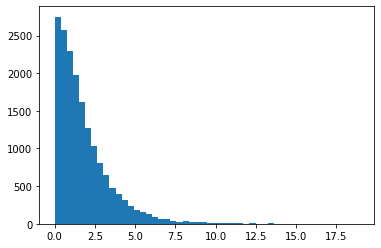

In [269]:
abs_errors = np.abs(mf_laplacian_l2_test_stats.y_test - mf_laplacian_l2_test_stats.y_pred)
plt.hist(abs_errors, bins=50);

### GCNMF

In [134]:
from gcnmf import one_snapshot
import gcnmf

np.random.seed(123)
torch.manual_seed(123)

In [64]:
dG = edge_topology_from_edges(edges)

num_epochs = 500
batch_size = 256
dim_size = 100
num_nodes = dG.number_of_nodes()
edge_index = get_edge_index(dG)

In [65]:
xa_obs = dataframe2xarray(obs, edges.shape[0])
xa_unobs = dataframe2xarray(unobs, edges.shape[0])

X_obs, X_unobs = torch.FloatTensor(xa_obs.values), torch.FloatTensor(xa_unobs.values)

In [136]:
num_epochs = 500
dim_size = 100

test_stats = pd.DataFrame({})
i = 0

y_test, y_pred, edgeid = gcnmf.one_snapshot(
    X_obs[:, :-n_test+i], 
    X_unobs[:, :-n_test+i],
    edge_index,
    num_epochs, 
    batch_size, 
    dim_size,
    num_nodes,
    device
)

test_stats = collect_test_stats(test_stats, i, edgeid, y_test, y_pred)
print(evaluated_message(y_test, y_pred))

 RMSE:   2.238 MAE:   1.614 Max Error:   13.09 MAEP:  0.1055


In [145]:
num_epochs = 500
dim_size = 100

test_stats = pd.DataFrame({})
i = 0

y_test, y_pred, edgeid = gcnmf.one_snapshot(
    X_obs[:, :-n_test+i], 
    X_unobs[:, :-n_test+i],
    edge_index,
    num_epochs, 
    batch_size, 
    dim_size,
    num_nodes,
    device
)

test_stats = collect_test_stats(test_stats, i, edgeid, y_test, y_pred)
print(evaluated_message(y_test, y_pred))

 RMSE:   2.181 MAE:    1.62 Max Error:   12.07 MAEP:  0.1051


In [ ]:
%%time

test_stats = pd.DataFrame({})
for i in range(n_test):
    y_test, y_pred, edgeid = one_snapshot(
        X_obs[:, :-n_test+i], 
        X_unobs[:, :-n_test+i],
        edge_index,
        num_epochs, 
        batch_size, 
        dim_size,
        num_nodes,
        device
    )

    test_stats = collect_test_stats(test_stats, i, edgeid, y_test, y_pred)
    if i % 10 == 0:
        print(f"Snapshot {i:4d}" + evaluated_message(y_test, y_pred))

save_test_stats(test_stats, "data/exp", "gcnmf_test_stats")        
gcnmf_test_stats = test_stats

In [62]:
print(evaluated_message(gcnmf_test_stats.y_test.values, gcnmf_test_stats.y_pred.values))

 RMSE:   2.697 MAE:   1.936 Max Error:   24.25 MAEP:   0.173


### TemporalMF

In [260]:
from temporalmf import one_snapshot
import temporalmf as tmf

np.random.seed(123)
torch.manual_seed(123)

num_epochs = 500
batch_size = 256
dim_size = 100

In [174]:
dG = edge_topology_from_edges(edges)
L = torch_sparse_laplacian(dG).to(device)

In [ ]:
test_stats = pd.DataFrame({})
i = 0

y_test, y_pred, edgeid = tmf.one_snapshot(
    X_obs[:, :-n_test+i], 
    X_unobs[:, :-n_test+i],
    L,
    num_epochs, 
    batch_size, 
    dim_size, 
    device,
    λ=1.0,
    η=0.01
)

test_stats = collect_test_stats(test_stats, 0, edgeid, y_test, y_pred)
print(evaluated_message(y_test, y_pred))
## λ=0.0,η=1e-3        RMSE:   2.217 MAE:   1.639 Max Error:   12.84 MAEP:  0.1054
## λ=0.0,η=1e-2        RMSE:   2.154 MAE:   1.565 Max Error:   11.62 MAEP:  0.1011  
## λ=1.0,η=1e-2        RMSE:   2.044 MAE:   1.451 Max Error:   11.48 MAEP: 0.09527       

In [ ]:
%%time
test_stats = pd.DataFrame({})
for i in range(n_test):
    y_test, y_pred, edgeid = one_snapshot(
        X_obs[:, :-n_test+i], 
        X_unobs[:, :-n_test+i],
        L,
        num_epochs, 
        batch_size, 
        dim_size, 
        device,
        λ=1.0,
        η=1e-2,
    )

    test_stats = collect_test_stats(test_stats, i, edgeid, y_test, y_pred)
    if i % 10 == 0:
        print(f"Snapshot {i:4d}" + evaluated_message(y_test, y_pred))

save_test_stats(test_stats, "data/exp", "nmf_laplacian_test_stats")        
mf_laplacian_test_stats = test_stats

## Performance comparison


| Methods                 | RMSE      | MAE       | MaxE       | MAPE       |
| ----------------------- | --------- | --------- | ---------- | ---------- |
| Gaussian Process        | 5.735     | 4.467     | 43.650     | 0.392      |
| Progressive Aggregation | 5.429     | 4.160     | 42.800     | 0.364      |
| Graph Auto-Encoder      | **3.662** | **2.718** | **32.060** | **0.2537** |
| Improvement  (GAE/PA )  | *32.55%*  | *34.66%*  | *25.09%*   | *30.30%*   |


| Methods                 | RMSE  | MAE   | MaxE   | MAPE  |
| ----------------------- | ----- | ----- | ------ | ----- |
| Gaussian Process        | 5.793 | 4.477 | 42.490 | 0.406 |
| Progressive Aggregation | 5.451 | 4.180 | 41.370 | 0.372 |
| Graph Auto-Encoder      | 3.656 | 2.792 | 28.480 | 0.247 |
| MF                      | 2.727 | 1.972 | 20.640 | 0.174 |
| MF + Laplacian          | 2.568 | 1.875 | 20.660 | 0.164 |
| MF + Laplacian+L2       | 2.481 | 1.795 | 18.900 | 0.159 |
| GCNMF                   | 2.697 | 1.936 | 24.250 | 0.173 |
| BipartiteGNN            | 3.452 | 2.639 | 26.010 | 0.231 |
| Spatial BipartiteGNN    | 3.411 | 2.597 | 27.711 | 0.229 |

In [8]:
## load
gp_test_stats = pd.read_csv("data/exp/gp_test_stats.csv")
pa_test_stats = pd.read_csv("data/exp/pa_test_stats.csv")
ga_test_stats = pd.read_csv("data/exp/ga_test_stats.csv")
mf_test_stats = pd.read_csv("data/exp/nmf_test_stats.csv")
mf_laplacian_test_stats = pd.read_csv("data/exp/nmf_laplacian_test_stats.csv")
gcnmf_test_stats = pd.read_csv("data/exp/gcnmf_test_stats.csv")

In [ ]:
edges['centroid'] = edges.to_crs(3857).centroid

In [13]:
gp_test_stats["error"] = np.abs(gp_test_stats.y_test - gp_test_stats.y_pred)

In [200]:
def test_stats2mae(test_stats):
    test_stats["error"] = np.abs(test_stats.y_test - test_stats.y_pred)
    mae = test_stats.groupby("edgeid").error.mean()

    mae = edges.merge(mae, left_index=True, right_index=True)[["centroid", "error"]]

    mae = gpd.GeoDataFrame(mae, geometry=mae.centroid)
    mae = mae.drop(columns=["centroid"])
    mae = mae.set_crs(3857).to_crs(4326)
    mae['lon'] = mae.geometry.x
    mae['lat'] = mae.geometry.y

    mae.loc[mae.error > 15, "error"] = 15
    return mae

In [204]:
gp_mae = test_stats2mae(gp_test_stats)
ga_mae = test_stats2mae(ga_test_stats)
mf_mae = test_stats2mae(mf_test_stats)

In [115]:
import altair as alt

In [207]:
alt.Chart(gp_mae).mark_circle(size=3).encode(
    longitude="lon:Q",
    latitude="lat:Q",
    color=alt.Color('error:Q', scale=alt.Scale(scheme="turbo")) #bin=alt.Bin(maxbins=10)
).project(
  rotate=[0, -45]
).properties(
    width=650,
    height=300
)

alt.Chart(...)

In [208]:
alt.Chart(ga_mae).mark_circle(size=3).encode(
    longitude="lon:Q",
    latitude="lat:Q",
    color=alt.Color('error:Q', scale=alt.Scale(scheme="turbo")) #bin=alt.Bin(maxbins=10)
).project(
  rotate=[0, -45]
).properties(
    width=650,
    height=300
)

alt.Chart(...)

In [209]:
alt.Chart(mf_mae).mark_circle(size=3).encode(
    longitude="lon:Q",
    latitude="lat:Q",
    color=alt.Color('error:Q', scale=alt.Scale(scheme="turbo")) #bin=alt.Bin(maxbins=10)
).project(
  rotate=[0, -45]
).properties(
    width=650,
    height=300
)

alt.Chart(...)

In [133]:
notnan = compose(np.logical_not, np.isnan)
obs_rate = notnan(xa_obs.values).sum(axis=1) / xa_obs.shape[1]

In [164]:
gp_road_summary = road_error_stats(gp_test_stats, obs_rate)
pa_road_summary = road_error_stats(pa_test_stats, obs_rate)
ga_road_summary = road_error_stats(ga_test_stats, obs_rate)
mf_road_summary = road_error_stats(mf_test_stats, obs_rate)
mf_laplacian_road_summary = road_error_stats(mf_laplacian_test_stats, obs_rate)
gcnmf_road_summary = road_error_stats(gcnmf_test_stats, obs_rate)

In [165]:
gp_range_errors = range_errors(gp_road_summary)
gp_range_errors

rmse       mae      mape
obs_rate                                
(0.0, 0.2]  4.636911  4.553158  0.537859
(0.2, 0.4]  4.698260  4.466478  0.500851
(0.4, 0.6]  4.658299  4.334078  0.426569
(0.6, 0.8]  4.542059  4.152967  0.406951
(0.8, 1.0]  5.115146  4.673826  0.377452

Text(0.5, 1.0, 'Gaussian Process')

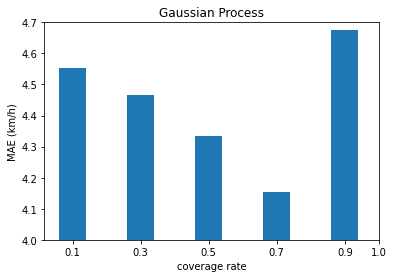

In [226]:
plt.bar([0.1, 0.3, 0.5, 0.7, 0.9], gp_range_errors.mae, width=0.08)
plt.ylim([4.0, 4.7])
plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.0])
plt.xlabel("coverage rate")
plt.ylabel("MAE (km/h)")
plt.title("Gaussian Process")

In [166]:
pa_range_errors = range_errors(pa_road_summary)
pa_range_errors

rmse       mae      mape
obs_rate                                
(0.0, 0.2]  4.759253  4.651343  0.522200
(0.2, 0.4]  4.926187  4.661382  0.511473
(0.4, 0.6]  4.699988  4.305534  0.414873
(0.6, 0.8]  4.570705  4.116375  0.398458
(0.8, 1.0]  4.573941  4.062918  0.318482

Text(0.5, 1.0, 'Progressive Aggregation')

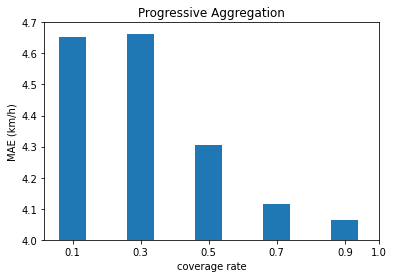

In [227]:
plt.bar([0.1, 0.3, 0.5, 0.7, 0.9], pa_range_errors.mae, width=0.08)
plt.ylim([4.0, 4.7])
plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.0])
plt.xlabel("coverage rate")
plt.ylabel("MAE (km/h)")
plt.title("Progressive Aggregation")

In [167]:
ga_range_errors = range_errors(ga_road_summary)
ga_range_errors

rmse       mae      mape
obs_rate                                
(0.0, 0.2]  2.735796  2.663293  0.234053
(0.2, 0.4]  2.820517  2.616962  0.235969
(0.4, 0.6]  2.989164  2.673632  0.212641
(0.6, 0.8]  3.015298  2.628493  0.232040
(0.8, 1.0]  3.369812  2.943619  0.269875

Text(0.5, 1.0, 'Graph Autoencoder')

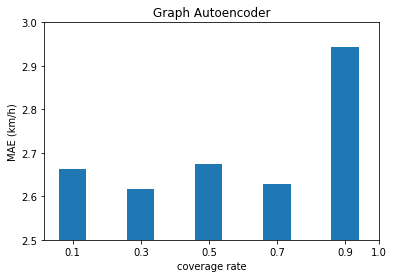

In [228]:
plt.bar([0.1, 0.3, 0.5, 0.7, 0.9], ga_range_errors.mae, width=0.08)
plt.ylim([2.5, 3.0])
plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.0])
plt.xlabel("coverage rate")
plt.ylabel("MAE (km/h)")
plt.title("Graph Autoencoder")

In [168]:
mf_range_errors = range_errors(mf_road_summary)
mf_range_errors

rmse       mae      mape
obs_rate                                
(0.0, 0.2]  2.484746  2.404625  0.230877
(0.2, 0.4]  2.396928  2.211291  0.208282
(0.4, 0.6]  2.341622  2.071684  0.174498
(0.6, 0.8]  2.280798  1.949919  0.172561
(0.8, 1.0]  2.275871  1.891252  0.166782

Text(0.5, 1.0, 'MF')

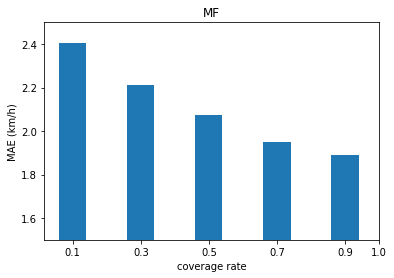

In [229]:
plt.bar([0.1, 0.3, 0.5, 0.7, 0.9], mf_range_errors.mae, width=0.08)
plt.ylim([1.5, 2.5])
plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.0])
plt.xlabel("coverage rate")
plt.ylabel("MAE (km/h)")
plt.title("MF")

In [169]:
mf_laplacian_range_errors = range_errors(mf_laplacian_road_summary)
mf_laplacian_range_errors

rmse       mae      mape
obs_rate                                
(0.0, 0.2]  2.372001  2.297471  0.231824
(0.2, 0.4]  2.350663  2.166833  0.207159
(0.4, 0.6]  2.306042  2.041738  0.172217
(0.6, 0.8]  2.190190  1.868707  0.166060
(0.8, 1.0]  2.114282  1.767082  0.151601

Text(0.5, 1.0, 'MF with Laplacian constraint')

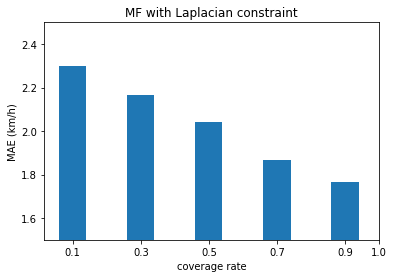

In [230]:
plt.bar([0.1, 0.3, 0.5, 0.7, 0.9], mf_laplacian_range_errors.mae, width=0.08)
plt.ylim([1.5, 2.5])
plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.0])
plt.xlabel("coverage rate")
plt.ylabel("MAE (km/h)")
plt.title("MF with Laplacian constraint")

In [194]:
gp_time_summary = time_error_stats(gp_test_stats)
pa_time_summary = time_error_stats(pa_test_stats)
ga_time_summary = time_error_stats(ga_test_stats)
mf_time_summary = time_error_stats(mf_test_stats)
mf_laplacian_time_summary = time_error_stats(mf_laplacian_test_stats)

Text(0.5, 1.0, 'Gaussian Process')

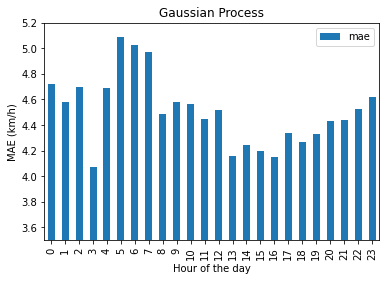

In [231]:
gp_time_summary.plot(y="mae", kind="bar")
plt.ylim([3.5, 5.2])
plt.xlabel("Hour of the day")
plt.ylabel("MAE (km/h)")
plt.title("Gaussian Process")

Text(0.5, 1.0, 'Progressive Aggregation')

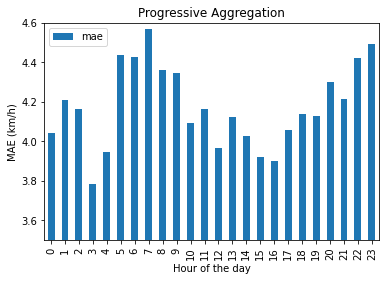

In [232]:
pa_time_summary.plot(y="mae", kind="bar")
plt.ylim([3.5, 4.6])
plt.xlabel("Hour of the day")
plt.ylabel("MAE (km/h)")
plt.title("Progressive Aggregation")

Text(0.5, 1.0, 'Graph Autoencoder')

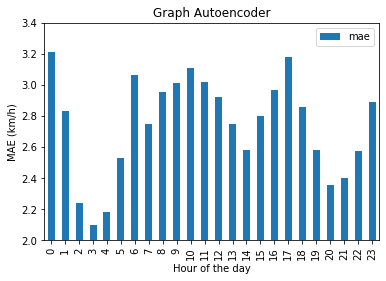

In [233]:
ga_time_summary.plot(y="mae", kind="bar")
plt.ylim([2.0, 3.4])
plt.xlabel("Hour of the day")
plt.ylabel("MAE (km/h)")
plt.title("Graph Autoencoder")

Text(0.5, 1.0, 'MF')

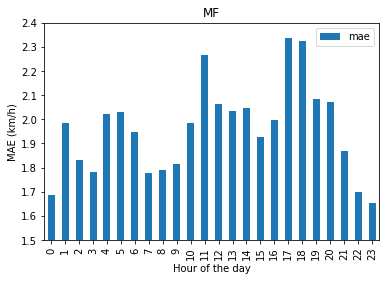

In [234]:
mf_time_summary.plot(y="mae", kind="bar")
plt.ylim([1.5, 2.4])
plt.xlabel("Hour of the day")
plt.ylabel("MAE (km/h)")
plt.title("MF")

Text(0.5, 1.0, 'MF with Laplacian constraint')

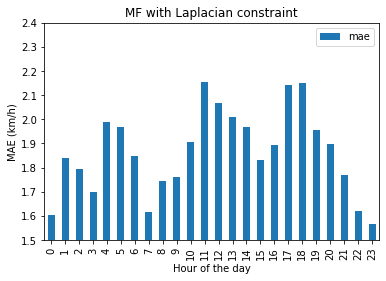

In [235]:
mf_laplacian_time_summary.plot(y="mae", kind="bar")
plt.ylim([1.5, 2.4])
plt.xlabel("Hour of the day")
plt.ylabel("MAE (km/h)")
plt.title("MF with Laplacian constraint")